CSCE 4143: Data Mining\
Xintao Wu, Ph.D.\
Practice Project\
Group 7: Levi Crider, Caleb Holmes, Spencer Smith, and Ethan Weems\
Step 2: Clustering

Import Packages

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Import Data from Adult Data File

In [4]:
labels = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "actual-value"]
numeric_labels = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
df = pd.read_table("./adult/adult.data", names=labels, delimiter=",")

Clean Data\
-Remove unknown values\
-Split numerical attributes into binary attributes

In [5]:
df = df.astype(str)

# using list comprehension
curr_labels = [i for i in labels if i not in numeric_labels]

substring = '\?' # character indicating null value
for label in curr_labels:
   filter = df[label].str.contains(substring) 
   df = df[~filter]

df = df.reset_index(drop=True)

df[numeric_labels] = df[numeric_labels].astype(float)

mean_values = df[numeric_labels].mean()

for num_label, threshold in mean_values.items():
    df[num_label] = df[num_label].apply(lambda x: 1 if x >= threshold else 0)

df[numeric_labels]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,1,1,0,0
1,1,0,1,0,0,0
2,0,1,0,0,0,0
3,1,1,0,0,0,0
4,0,1,1,0,0,0
...,...,...,...,...,...,...
30157,0,1,1,0,0,0
30158,1,0,0,0,0,0
30159,1,0,0,0,0,0
30160,0,1,0,0,0,0


Perform One-Hot Encoding and Split Data

In [6]:
X = df[curr_labels[0 : len(curr_labels) - 1]]
y = df["actual-value"].values

one_hot = OneHotEncoder()
label_encoder = LabelEncoder()
x_encode = one_hot.fit_transform(X).toarray()
y_encode = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x_encode, y_encode, test_size=0.2)


Build K-means Clustering Algorithm 

In [7]:
def createKMeansCluster(num):
    # create and train model
    kmeans = KMeans(n_clusters=num, random_state=42)
    kmeans.fit(X_train)
    
    centroids = kmeans.cluster_centers_
    
    return centroids

3 Clusters

In [8]:
createKMeansCluster(3)

/home/emweems/anaconda3/envs/meeg591v/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 3.42363799e-02,  6.94651186e-02,  6.78475737e-01,
         5.91445867e-02,  1.18785353e-01,  3.94958817e-02,
         3.96943535e-04,  2.38166121e-02,  2.32211968e-02,
         7.74039893e-03,  5.25950184e-03,  1.05190037e-02,
         2.37173762e-02,  1.47861467e-02,  2.97707651e-02,
         4.66408653e-02,  1.83983328e-01,  1.95494691e-02,
         3.25096755e-01,  6.66865138e-02,  8.93122953e-04,
         2.72898680e-02,  1.91029076e-01,  1.55431223e-15,
         7.93887070e-04,  9.99206113e-01, -1.00613962e-16,
        -7.77156117e-16,  1.21430643e-16, -4.75314232e-16,
         4.88240548e-02,  1.98471767e-04,  1.98074824e-01,
         1.71479607e-01,  4.37630247e-02,  3.56256822e-02,
         7.18467798e-02,  4.22744865e-02,  9.92358837e-05,
         1.40319540e-01,  2.91753498e-02,  1.14121266e-01,
         2.72898680e-02,  7.69078099e-02,  9.90572591e-01,
         2.97707651e-04,  5.55720949e-03,  3.47325593e-03,
        -1.49880108e-15,  9.92358837e-05,  7.83963481e-0

5 Clusters

In [9]:
createKMeansCluster(5)

/home/emweems/anaconda3/envs/meeg591v/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 2.51009810e-02,  6.00115407e-02,  8.34391229e-01,
         6.92440854e-03,  2.33698788e-02,  5.02019619e-02,
         1.08420217e-18,  2.25043278e-02,  4.64512406e-02,
         1.84650894e-02,  2.88517023e-03,  5.77034045e-03,
         6.92440854e-03,  9.23254472e-03,  3.46220427e-02,
         4.01038661e-02,  1.97634160e-01,  8.07847663e-03,
         2.58799769e-01,  4.52971725e-02,  2.01961916e-03,
         7.21292556e-03,  2.93998846e-01, -4.99600361e-16,
        -1.40946282e-18,  1.11022302e-15,  4.61627236e-03,
         9.94806694e-01,  5.77034045e-04,  6.93889390e-18,
         2.53029429e-01, -1.24683250e-18,  1.52914022e-02,
         8.85747259e-02,  5.19330641e-03,  1.90421235e-02,
         4.67397576e-02,  1.94171956e-01,  1.21177149e-02,
         1.49451818e-01,  8.36699365e-03,  1.60126947e-01,
         3.92383151e-02,  8.65551068e-03,  6.10622664e-16,
         4.39699942e-01,  4.67397576e-02,  3.94979804e-01,
         1.18580496e-01, -2.08166817e-17,  7.78995961e-0

10 Clusters

In [10]:
createKMeansCluster(10)

/home/emweems/anaconda3/envs/meeg591v/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 4.56371986e-02,  1.07634902e-01,  5.47359357e-01,
         9.29965557e-02,  1.36911596e-01,  6.91733639e-02,
         2.87026406e-04,  1.26291619e-02,  1.20551091e-02,
         5.74052813e-03,  2.29621125e-03,  4.87944891e-03,
         1.89437428e-02,  6.31458094e-03,  4.16188289e-02,
         4.47761194e-02,  5.32146958e-01,  5.53960964e-02,
        -4.44089210e-16,  1.88863375e-01,  2.87026406e-04,
         7.40528129e-02, -1.11022302e-15, -4.99600361e-16,
         2.87026406e-04,  9.99712974e-01, -1.38777878e-17,
        -6.10622664e-16, -5.89805982e-17,  6.93889390e-18,
         3.93226177e-02,  2.87026406e-04,  3.41561424e-02,
         3.08266361e-01,  3.41561424e-02,  8.61079219e-03,
         9.47187141e-03,  1.80826636e-02,  2.87026406e-04,
         3.46727899e-01,  2.58323766e-02,  1.24282434e-01,
         2.72675086e-02,  2.32491389e-02,  9.92250287e-01,
         2.87026406e-04,  5.45350172e-03,  1.72215844e-03,
         2.91433544e-16,  2.87026406e-04,  2.29621125e-0

K-Nearest Neighbor Algorithm

In [11]:
def kNN_Wrapper(num):
    # use last 10 records from test data
    data = X_test[len(X_test) - 10: len(X_test)]
    
    knn = KNeighborsClassifier(n_neighbors=num)
    
    knn.fit(X_train, y_train)
    
    predictions = knn.predict(data)
    predictions
    
    accuracy = accuracy_score(y_test[len(y_test) - 10 : len(y_test)], predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    print(classification_report(y_test[len(y_test) - 10 : len(y_test)], predictions))

kNN 3

In [12]:
kNN_Wrapper(3)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.33      1.00      0.50         1

    accuracy                           0.80        10
   macro avg       0.67      0.89      0.69        10
weighted avg       0.93      0.80      0.84        10



kNN 5

In [13]:
kNN_Wrapper(5)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.33      1.00      0.50         1

    accuracy                           0.80        10
   macro avg       0.67      0.89      0.69        10
weighted avg       0.93      0.80      0.84        10



kNN 10

In [14]:
kNN_Wrapper(10)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.33      1.00      0.50         1

    accuracy                           0.80        10
   macro avg       0.67      0.89      0.69        10
weighted avg       0.93      0.80      0.84        10



<h1>Task #3:</h3>
Build SVM classifier and report the predicted accuracy of the test data.

In [15]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [16]:
# instantiate the model using sklearn library
svm_model = svm.SVC()
# train the model on the training data defined previously
svm_model.fit(X_train, y_train)

SVC()

In [17]:
# evaluate performance of model using unseen test data
svm_predictions = svm_model.predict(X_test)

Compare predictions to the true values

In [24]:
def plot_confusion_matrix(predictions, true):
    confMat = confusion_matrix(true, predictions)
    dispConfMat = ConfusionMatrixDisplay(confusion_matrix=confMat)
    dispConfMat.plot()
    plt.title("Confusion Matrix")
    plt.show()
    accuracy = accuracy_score(y_true=true, y_pred=predictions)
    print("The accuracy of the model is", accuracy)


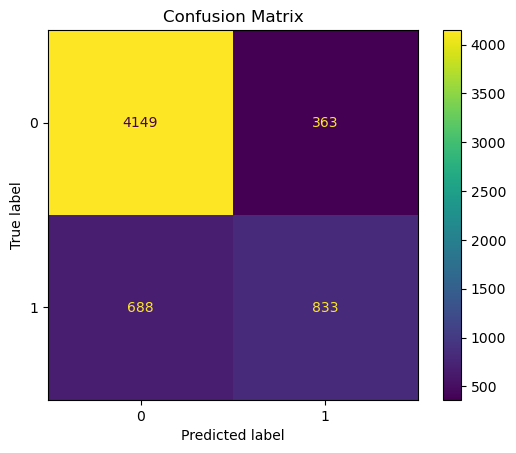

The accuracy of the model is 0.8257914801922758


In [23]:
plot_confusion_matrix(predictions=svm_predictions,true=y_test)

<h1>Task #4:</h3>
Build a neural network classifier and report the predicted accuracy of the test data.

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
# instantiate the model using sklearn library
nn_model = MLPClassifier(random_state=77, max_iter=500)
# train the model using the training data defined previously
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=77)

In [21]:
# evaluate the model using the previously unseen testing data
nn_predictions = nn_model.predict(X_test)

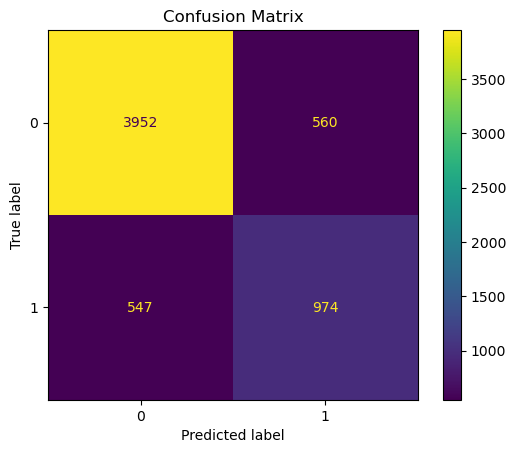

The accuracy of the model is 0.8165091994032819


In [26]:
plot_confusion_matrix(predictions=nn_predictions,true=y_test)